In [1]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline 
from sklearn.datasets import load_files
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#DATA_DIR = './raw/'
DATA_DIR = './cleanRaw/'

In [2]:
docs_data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace",
    description=None, load_content=True, shuffle=True, random_state=42)

#---------------------------------------
# For step 2:
# read files from the "raw" folder and lemmatize the words.
# then select only noun and verb.
# use the newly created data for the following classification
#---------------------------------------

# calculate count of each category
labels, counts = np.unique(docs_data.target, return_counts=True)

# convert data.target_names to np array for indexing
labels_str = np.array(docs_data.target_names)[labels]

print(dict(zip(labels_str, counts)))

{'democratic': 23, 'republican': 24}


In [3]:
docs_data.target_names

['democratic', 'republican']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(docs_data.data,
    docs_data.target, test_size=0.2, random_state=42)

In [5]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('clf', SGDClassifier(loss='log', penalty='l2',
                                           alpha=1e-3, random_state=42)),
])

text_clf2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('NB', MultinomialNB()),
])

#---------
text_clf3 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('RF', RandomForestClassifier()),
])

text_clf4 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('SVM', SVC()),
])
#---------

models = [("CLF", text_clf), ("NB", text_clf2), ("RF", text_clf3), ("SVM", text_clf4)]
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=5).mean()) for name, model in models]
scores = sorted(unsorted_scores, key=lambda x: x[1])
print(scores)  

# write a code to select the best classifier 

get_model_name = scores[-1][0]
print(get_model_name)


text_clf = [i[1] for i in models if i[0]==get_model_name][0]

[('SVM', 0.40714285714285714), ('RF', 0.43571428571428567), ('CLF', 0.45357142857142857), ('NB', 0.4607142857142857)]
NB


In [6]:
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('NB', MultinomialNB())])

In [7]:
#---show only the best performace results: accuracy, other metrics, and confusion matrix
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print (accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred,
    target_names=docs_data.target_names))

0.7
              precision    recall  f1-score   support

  democratic       1.00      0.40      0.57         5
  republican       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



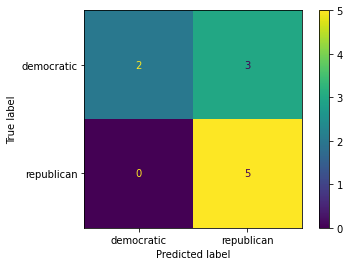

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=docs_data.target_names).plot()

### Step 2)

In [9]:
DATA_DIR = './raw/'

docs_data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace",
    description=None, load_content=True, shuffle=True, random_state=42)

# calculate count of each category
labels, counts = np.unique(docs_data.target, return_counts=True)

# convert data.target_names to np array for indexing
labels_str = np.array(docs_data.target_names)[labels]

print(dict(zip(labels_str, counts)))

{'democratic': 23, 'republican': 24}


In [10]:
# import these modules
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
final_text = []
for i in docs_data.data:
    word_list = i.split() # Tokenize: Split the sentence into words
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list]) # Lemmatize list of words and join
    extract_noun_verb = ' '.join([word for (word, pos) in nltk.pos_tag(lemmatized_output.split()) if(pos[:2] == 'NN') \
                                  or (pos[:2] == 'VB')]) # select only noun and verb.   
    final_text.append(extract_noun_verb)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(final_text,
    docs_data.target, test_size=0.2, random_state=42)

In [13]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('clf', SGDClassifier(loss='log', penalty='l2',
                                           alpha=1e-3, random_state=42)),
])

text_clf2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('NB', MultinomialNB()),
])

#---------
text_clf3 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('RF', RandomForestClassifier()),
])

text_clf4 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('SVM', SVC()),
])
#---------

models = [("CLF", text_clf), ("NB", text_clf2), ("RF", text_clf3), ("SVM", text_clf4)]
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=5).mean()) for name, model in models]
scores = sorted(unsorted_scores, key=lambda x: x[1])
print(scores)  

# write a code to select the best classifier 

get_model_name = scores[-1][0]
print(get_model_name)


text_clf = [i[1] for i in models if i[0]==get_model_name][0]

[('SVM', 0.3821428571428571), ('NB', 0.4107142857142857), ('RF', 0.46428571428571425), ('CLF', 0.4892857142857142)]
CLF


In [14]:
#---show only the best performace results: accuracy, other metrics, and confusion matrix
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print (accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred,
    target_names=docs_data.target_names))

0.6
              precision    recall  f1-score   support

  democratic       0.67      0.40      0.50         5
  republican       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



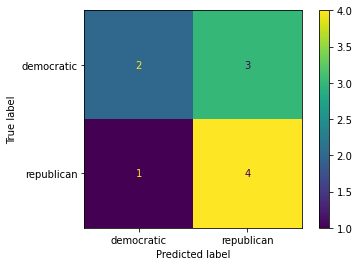

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=docs_data.target_names).plot()